In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df_bookings=pd.read_csv('fact_bookings.csv')

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.booking_status.value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

In [6]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

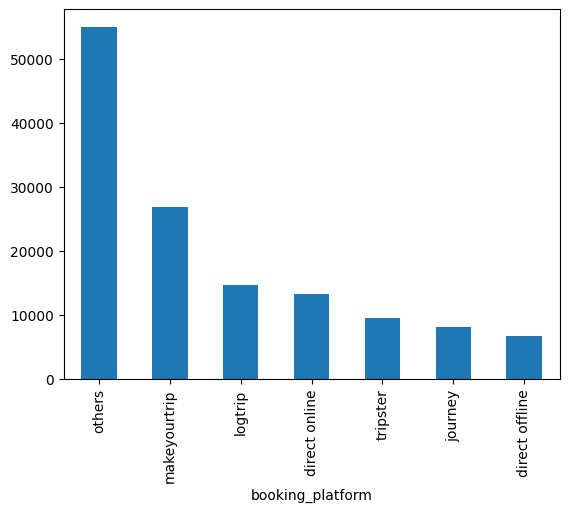

In [7]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

In [8]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [9]:
df_bookings.revenue_generated.describe()

count    1.345900e+05
mean     1.537805e+04
std      9.303604e+04
min      6.500000e+03
25%      9.900000e+03
50%      1.350000e+04
75%      1.800000e+04
max      2.856000e+07
Name: revenue_generated, dtype: float64

In [10]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [11]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [12]:
df_date=pd.read_csv('dim_date.csv')
df_hotels=pd.read_csv('dim_hotels.csv')
df_rooms=pd.read_csv('dim_rooms.csv')
df_aggregated_bookings=pd.read_csv('fact_aggregated_bookings.csv')
df_new_data_august=pd.read_csv('new_data_august.csv')

In [13]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [14]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [15]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

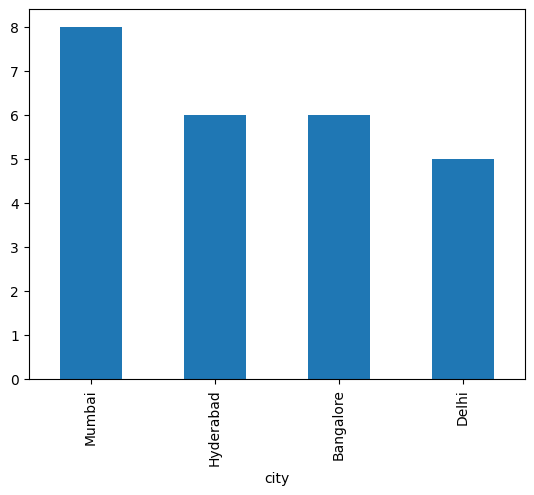

In [16]:
df_hotels.city.value_counts().plot(kind='bar')


In [17]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [18]:
df_aggregated_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [19]:
df_aggregated_bookings.groupby('property_id')["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [20]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings>df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [21]:
df_aggregated_bookings.capacity.max()

50.0

In [22]:
df_aggregated_bookings[df_aggregated_bookings.capacity==df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


Data Cleaning

In [23]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [24]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [25]:
df_bookings.no_guests.describe()

count    134587.000000
mean          2.036170
std           1.034885
min         -17.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: no_guests, dtype: float64

In [26]:
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [27]:
df_bookings.shape

(134590, 12)

In [28]:
df_bookings=df_bookings[df_bookings.no_guests>0]

In [29]:
df_bookings.shape

(134578, 12)

In [30]:
df_bookings.revenue_generated.min()

6500

In [31]:
df_bookings.revenue_generated.max()

28560000

In [32]:
revenue_generated_std=df_bookings.revenue_generated.std()
revenue_generated_std

93040.1549314641

In [33]:
revenue_generated_mean=df_bookings.revenue_generated.mean()
revenue_generated_mean

15378.036937686695

In [34]:
higher_limit_revenue_generated=revenue_generated_mean+3*revenue_generated_std
higher_limit_revenue_generated

294498.50173207896

In [35]:
lower_limit_revenue_generated=revenue_generated_mean-3*revenue_generated_std
lower_limit_revenue_generated

-263742.4278567056

In [36]:
df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit_revenue_generated]

In [37]:
df_bookings.shape

(134573, 12)

In [38]:
df_bookings.revenue_realized.min()

2600

In [39]:
df_bookings.revenue_realized.max()

45220

In [40]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [41]:
higher_limit_revenue_realized=12695+3*6927  
higher_limit_revenue_realized

33476

In [42]:
df_bookings[df_bookings.revenue_realized>higher_limit_revenue_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [43]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [44]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [45]:
higher_limit=23439+3*9048

In [46]:
higher_limit

50583

In [47]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [48]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [49]:
df_aggregated_bookings.isnull()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9195,False,False,False,False,False
9196,False,False,False,False,False
9197,False,False,False,False,False
9198,False,False,False,False,False


In [50]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [51]:
df_aggregated_bookings[df_aggregated_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [52]:
df_aggregated_bookings.capacity.median()

25.0

In [53]:
df_aggregated_bookings.capacity.fillna(df_aggregated_bookings.capacity.median(), inplace=True)

In [54]:
df_aggregated_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [55]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [56]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings>df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [57]:
df_aggregated_bookings.shape

(9200, 5)

In [58]:
df_aggregated_bookings=df_aggregated_bookings[df_aggregated_bookings.successful_bookings<=df_aggregated_bookings.capacity]
df_aggregated_bookings.shape

(9194, 5)

DATA TRANSFORMATION


In [59]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [60]:
df_aggregated_bookings["oct_pct"]=df_aggregated_bookings["successful_bookings"]/df_aggregated_bookings["capacity"]

In [61]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [62]:
df_aggregated_bookings["oct_pct"]=df_aggregated_bookings["oct_pct"].apply(lambda x: round(x*100,2))

In [63]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


1. What is an avereage occupancy rate in each of room categories?

In [64]:
df_aggregated_bookings.groupby("room_category")["oct_pct"].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: oct_pct, dtype: float64

In [65]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [66]:
df=pd.merge(df_aggregated_bookings,df_rooms, left_on="room_category",right_on="room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard
...,...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [67]:
df.groupby("room_class")["oct_pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: oct_pct, dtype: float64

In [68]:
df.drop("room_id",axis=1,inplace=True)

In [69]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard
...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


2. Print average occupancy rate per city

In [70]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard
...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


In [71]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [72]:
df1=pd.merge(df,df_hotels,on="property_id")
df1

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9189,16563,27-Jul-22,RT4,10,18.0,55.56,Presidential,Atliq Palace,Business,Delhi
9190,16563,28-Jul-22,RT4,9,18.0,50.00,Presidential,Atliq Palace,Business,Delhi
9191,16563,29-Jul-22,RT4,9,18.0,50.00,Presidential,Atliq Palace,Business,Delhi
9192,16563,30-Jul-22,RT4,11,18.0,61.11,Presidential,Atliq Palace,Business,Delhi


In [73]:
df1.groupby("city")["oct_pct"].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: oct_pct, dtype: float64

3. When was the occupancy better? Weekday or weekemd?

In [74]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [75]:
df2=pd.merge(df1,df_date ,left_on="check_in_date",right_on="date")
df2

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6493,16563,31-Jul-22,RT1,34,41.0,82.93,Standard,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend


In [76]:
df2.drop("date",axis=1,inplace=True)

In [77]:
df2

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
6493,16563,31-Jul-22,RT1,34,41.0,82.93,Standard,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend


<Axes: xlabel='day_type'>

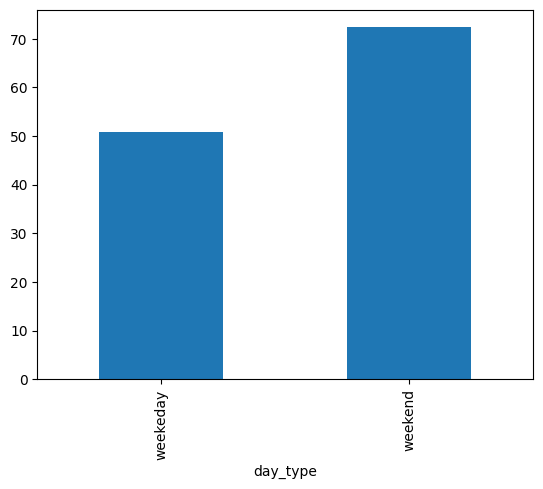

In [78]:
df2.groupby("day_type")["oct_pct"].mean().plot(kind="bar")

4.In the month of june, what is the occupancy for different cities?

In [79]:
df2

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
6493,16563,31-Jul-22,RT1,34,41.0,82.93,Standard,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend


In [80]:
df2["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [81]:
df_june_22=df2[df2["mmm yy"]=="Jun 22"]

In [82]:
df_june_22


,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,17558,30-Jun-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jun 22,W 27,weekeday
4295,16563,30-Jun-22,RT1,27,41.0,65.85,Standard,Atliq Palace,Business,Delhi,Jun 22,W 27,weekeday
4296,16563,30-Jun-22,RT2,22,38.0,57.89,Elite,Atliq Palace,Business,Delhi,Jun 22,W 27,weekeday
4297,16563,30-Jun-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,Jun 22,W 27,weekeday


In [83]:
df_june_22.groupby("city")["oct_pct"] .mean().round(2).sort_values()

city
Bangalore    56.44
Mumbai       58.38
Hyderabad    58.46
Delhi        62.47
Name: oct_pct, dtype: float64

In [84]:
df_new_data_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [85]:
df2.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'oct_pct', 'room_class', 'property_name', 'category',
       'city', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [86]:
df_new_data_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [87]:
new_df=pd.concat([df2,df_new_data_august],ignore_index=True,axis=0)

In [88]:
new_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday,62.50


print revenue realized per city?

In [89]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [90]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [91]:
df3=pd.merge(df_bookings,df_hotels,on="property_id")
df3

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [92]:
df3.groupby("city")["revenue_realized"].sum().sort_values()

city
Delhi        294404488
Hyderabad    325179310
Bangalore    420383550
Mumbai       668569251
Name: revenue_realized, dtype: int64

<Axes: xlabel='city'>

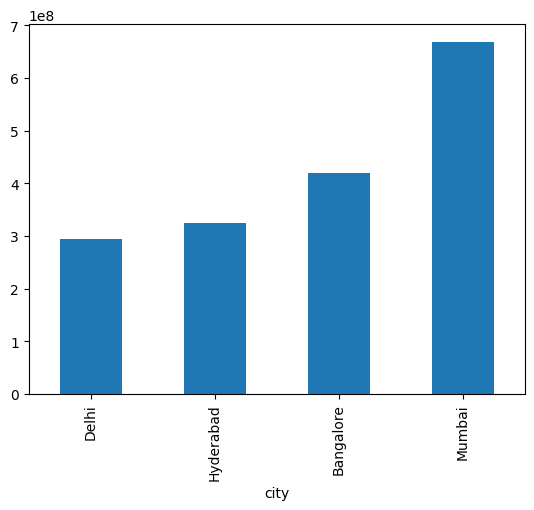

In [93]:
df3.groupby("city")["revenue_realized"].sum().sort_values().plot(kind="bar")

Print month by month revenue?

In [94]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [95]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [96]:
pd.merge(df_date,df_bookings,left_on="date",right_on="check_in_date")

,date,mmm yy,week no,day_type,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [97]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [98]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [100]:
df_date["date"]=pd.to_datetime(df_date["date"])

C:\Users\hario\AppData\Local\Temp\ipykernel_3856\1124805798.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]=pd.to_datetime(df_date["date"])


In [ ]:
df_date

In [ ]:
df_date.info()

In [103]:
df_bookings["check_in_date"] = pd.to_datetime(df_bookings["check_in_date"], format="%d-%m-%y", errors='coerce')


In [104]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      78783 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


In [ ]:
df_bookings

In [106]:
df5=pd.merge(df_date,df_bookings,left_on="date",right_on="check_in_date")

In [107]:
df5

,date,mmm yy,week no,day_type,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,2022-05-13,May 22,W 20,weekeday,May132216558RT11,16558,10/5/2022,2022-05-13,15-05-22,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
1,2022-05-13,May 22,W 20,weekeday,May132216558RT12,16558,9/5/2022,2022-05-13,14-05-22,2.0,RT1,makeyourtrip,NaN,Cancelled,9100,3640
2,2022-05-13,May 22,W 20,weekeday,May132216558RT13,16558,9/5/2022,2022-05-13,14-05-22,1.0,RT1,logtrip,NaN,Checked Out,9100,9100
3,2022-05-13,May 22,W 20,weekeday,May132216558RT14,16558,8/5/2022,2022-05-13,19-05-22,2.0,RT1,tripster,5.0,Checked Out,9100,9100
4,2022-05-13,May 22,W 20,weekeday,May132216558RT15,16558,7/5/2022,2022-05-13,18-05-22,1.0,RT1,direct online,NaN,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78778,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
78779,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
78780,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
78781,2022-07-31,Jul 22,W 32,weekend,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [108]:
df5.drop("date",axis=1,inplace=True)

In [109]:
df5

,mmm yy,week no,day_type,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May 22,W 20,weekeday,May132216558RT11,16558,10/5/2022,2022-05-13,15-05-22,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
1,May 22,W 20,weekeday,May132216558RT12,16558,9/5/2022,2022-05-13,14-05-22,2.0,RT1,makeyourtrip,NaN,Cancelled,9100,3640
2,May 22,W 20,weekeday,May132216558RT13,16558,9/5/2022,2022-05-13,14-05-22,1.0,RT1,logtrip,NaN,Checked Out,9100,9100
3,May 22,W 20,weekeday,May132216558RT14,16558,8/5/2022,2022-05-13,19-05-22,2.0,RT1,tripster,5.0,Checked Out,9100,9100
4,May 22,W 20,weekeday,May132216558RT15,16558,7/5/2022,2022-05-13,18-05-22,1.0,RT1,direct online,NaN,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78778,Jul 22,W 32,weekend,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
78779,Jul 22,W 32,weekend,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
78780,Jul 22,W 32,weekend,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
78781,Jul 22,W 32,weekend,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [111]:
df5.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    329662416
Jun 22    324288215
May 22    347414213
Name: revenue_realized, dtype: int64

<Axes: xlabel='mmm yy'>

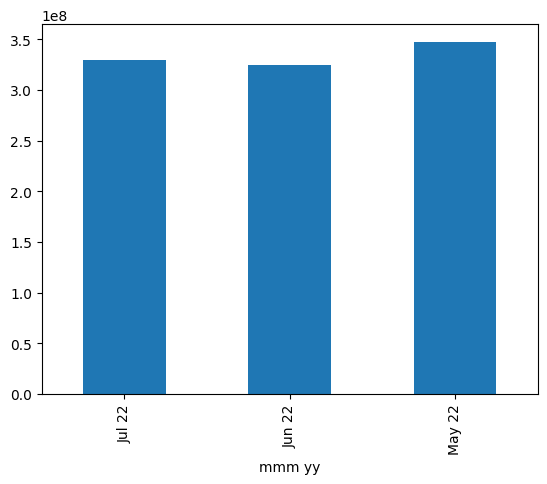

In [114]:
df5.groupby("mmm yy")["revenue_realized"].sum().plot(kind="bar")

5. Print revenue realized per hotel type

In [116]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [118]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,NaT,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,NaT,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,NaT,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [121]:
df=pd.merge(df_hotels,df_bookings, on="property_id")
df

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,NaT,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,NaT,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,NaT,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT17,28-04-22,NaT,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT18,26-04-22,NaT,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT45,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134569,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT46,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134570,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT48,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134571,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT49,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [123]:
df.groupby("category")["revenue_realized"].mean().round(2)

category
Business    12880.28
Luxury      12583.77
Name: revenue_realized, dtype: float64

print averate rating per city

In [125]:
df.head(2)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,NaT,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,NaT,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [127]:
df.groupby("city")["ratings_given"].mean().round()

city
Bangalore    3.0
Delhi        4.0
Hyderabad    4.0
Mumbai       4.0
Name: ratings_given, dtype: float64

print a pie chart of revenue realized per booking platform

In [131]:
df.groupby("booking_platform")["revenue_realized"].sum()

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

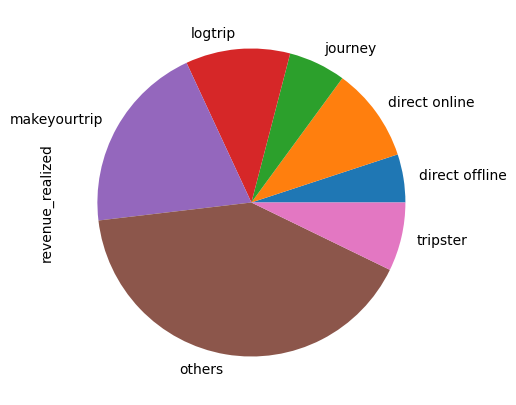

In [132]:
df.groupby("booking_platform")["revenue_realized"].sum().plot.pie(y="booking_platform",figsize=(5,5))